### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.
Create a new column 'Call' , whose entries are - 
'Buy' if the stock price is below the lower Bollinger band 
'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
'Short' if the stock price is above the upper Bollinger band
Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)
Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [55]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [56]:
os.chdir('D:\downloads')
shares=pd.read_csv('MindTree.csv')
shares

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MINDTREE,EQ,15-May-2017,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90
1,MINDTREE,EQ,16-May-2017,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65
2,MINDTREE,EQ,17-May-2017,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35
3,MINDTREE,EQ,18-May-2017,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05
4,MINDTREE,EQ,19-May-2017,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42
5,MINDTREE,EQ,22-May-2017,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77
6,MINDTREE,EQ,23-May-2017,502.35,504.00,507.45,491.00,498.00,501.15,498.72,452893,2.258664e+08,8567,198703,43.87
7,MINDTREE,EQ,24-May-2017,501.15,502.00,515.00,494.05,511.95,509.95,506.72,823967,4.175211e+08,15083,351179,42.62
8,MINDTREE,EQ,25-May-2017,509.95,513.70,549.50,508.45,542.50,543.90,532.14,1632427,8.686829e+08,25072,693340,42.47
9,MINDTREE,EQ,26-May-2017,543.90,540.00,544.00,532.00,533.45,535.20,537.15,461613,2.479538e+08,12606,113087,24.50


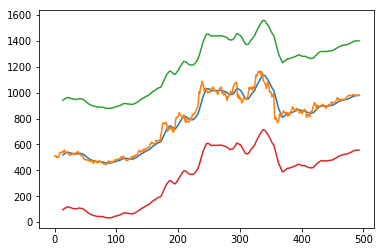

In [57]:
Close_Price=shares['Close Price'].rolling(window=14)
Avg=shares['Average Price']
roll_mean=Close_Price.mean()
std_dev=roll_mean.std()
avg=pd.DataFrame(roll_mean)
Upper_band=roll_mean+(2*std_dev)
Lower_band=roll_mean-(2*std_dev)
plt.plot(avg)
plt.plot(Avg)
plt.plot(Upper_band)
plt.plot(Lower_band)

In [58]:
shares['Bollinger band']=avg
shares['Upper band']=Upper_band
shares['Lower band']=Lower_band
shares

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Bollinger band,Upper band,Lower band
0,MINDTREE,EQ,15-May-2017,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,NaN,NaN,NaN
1,MINDTREE,EQ,16-May-2017,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,NaN,NaN,NaN
2,MINDTREE,EQ,17-May-2017,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,NaN,NaN,NaN
3,MINDTREE,EQ,18-May-2017,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,NaN,NaN,NaN
4,MINDTREE,EQ,19-May-2017,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,NaN,NaN,NaN
5,MINDTREE,EQ,22-May-2017,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,NaN,NaN,NaN
6,MINDTREE,EQ,23-May-2017,502.35,504.00,507.45,491.00,498.00,501.15,498.72,452893,2.258664e+08,8567,198703,43.87,NaN,NaN,NaN
7,MINDTREE,EQ,24-May-2017,501.15,502.00,515.00,494.05,511.95,509.95,506.72,823967,4.175211e+08,15083,351179,42.62,NaN,NaN,NaN
8,MINDTREE,EQ,25-May-2017,509.95,513.70,549.50,508.45,542.50,543.90,532.14,1632427,8.686829e+08,25072,693340,42.47,NaN,NaN,NaN
9,MINDTREE,EQ,26-May-2017,543.90,540.00,544.00,532.00,533.45,535.20,537.15,461613,2.479538e+08,12606,113087,24.50,NaN,NaN,NaN


In [59]:
shares['Call']=pd.DataFrame

In [60]:
for i in range(12,494):
    if(shares['Lower band'].iloc[i]>shares['Average Price'].iloc[i]):
        shares['Call'].iloc[i]='Buy'
    elif((shares['Average Price'].iloc[i]>shares['Lower band'].iloc[i])&(shares['Average Price'].iloc[i]<shares['Bollinger band'].iloc[i])):
        shares['Call'].iloc[i]='Hold buy/Liquidate short'
    elif((shares['Average Price'].iloc[i]<shares['Upper band'].iloc[i])and(shares['Average Price'].iloc[i]>shares['Bollinger band'].iloc[i])):
        shares['Call'].iloc[i]='Hold short/Liquidate buy'
    elif(shares['Average Price'].iloc[i]>shares['Upper band'].iloc[i]):
        shares['Call'].iloc[i]='Sell'

C:\Users\prash\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [61]:
shares

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Bollinger band,Upper band,Lower band,Call
0,MINDTREE,EQ,15-May-2017,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
1,MINDTREE,EQ,16-May-2017,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
2,MINDTREE,EQ,17-May-2017,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
3,MINDTREE,EQ,18-May-2017,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
4,MINDTREE,EQ,19-May-2017,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
5,MINDTREE,EQ,22-May-2017,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
6,MINDTREE,EQ,23-May-2017,502.35,504.00,507.45,491.00,498.00,501.15,498.72,452893,2.258664e+08,8567,198703,43.87,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
7,MINDTREE,EQ,24-May-2017,501.15,502.00,515.00,494.05,511.95,509.95,506.72,823967,4.175211e+08,15083,351179,42.62,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
8,MINDTREE,EQ,25-May-2017,509.95,513.70,549.50,508.45,542.50,543.90,532.14,1632427,8.686829e+08,25072,693340,42.47,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
9,MINDTREE,EQ,26-May-2017,543.90,540.00,544.00,532.00,533.45,535.20,537.15,461613,2.479538e+08,12606,113087,24.50,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>


In [62]:
X=pd.DataFrame(shares.iloc[13:494,15:18])
X['Close Price']=shares['Close Price']
Y=shares.iloc[13:494,18]
Y

13     Hold short/Liquidate buy
14     Hold short/Liquidate buy
15     Hold short/Liquidate buy
16     Hold short/Liquidate buy
17     Hold short/Liquidate buy
18     Hold short/Liquidate buy
19     Hold short/Liquidate buy
20     Hold buy/Liquidate short
21     Hold buy/Liquidate short
22     Hold buy/Liquidate short
23     Hold buy/Liquidate short
24     Hold buy/Liquidate short
25     Hold buy/Liquidate short
26     Hold buy/Liquidate short
27     Hold buy/Liquidate short
28     Hold buy/Liquidate short
29     Hold short/Liquidate buy
30     Hold short/Liquidate buy
31     Hold short/Liquidate buy
32     Hold short/Liquidate buy
33     Hold short/Liquidate buy
34     Hold short/Liquidate buy
35     Hold short/Liquidate buy
36     Hold short/Liquidate buy
37     Hold short/Liquidate buy
38     Hold short/Liquidate buy
39     Hold buy/Liquidate short
40     Hold buy/Liquidate short
41     Hold buy/Liquidate short
42     Hold buy/Liquidate short
                 ...           
464    H

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [64]:
d_tree=DecisionTreeClassifier()
d_tree=d_tree.fit(X_train,Y_train)
y_pred=d_tree.predict(X_test)
y_pred=pd.DataFrame(y_pred)


In [65]:
print('Accuracy:',metrics.accuracy_score(y_pred,Y_test))

Accuracy: 0.8413793103448276


In [66]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, Y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 

print('Accuracy:',metrics.accuracy_score(y_pred,Y_test))

Accuracy: 0.6413793103448275


In [67]:
reg=linear_model.LogisticRegression()
reg=reg.fit(X_train,Y_train)
y_pred=reg.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0
0,Hold buy/Liquidate short
1,Hold buy/Liquidate short
2,Hold buy/Liquidate short
3,Hold buy/Liquidate short
4,Hold short/Liquidate buy
5,Hold buy/Liquidate short
6,Hold buy/Liquidate short
7,Hold buy/Liquidate short
8,Hold buy/Liquidate short
9,Hold buy/Liquidate short


In [68]:
print('Accuracy:',metrics.accuracy_score(y_pred,Y_test))

Accuracy: 0.9448275862068966


In [69]:
from sklearn.svm import SVC
regr=SVC(kernel='linear')
regr=regr.fit(X_train,Y_train)
y_pred=regr.predict(X_test)

In [70]:
print('Accuracy:',metrics.accuracy_score(y_pred,Y_test))

Accuracy: 0.9310344827586207


In [71]:
shares2=pd.read_csv('JUBLFOOD.csv')
shares2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,JUBLFOOD,EQ,15-May-2017,986.35,991.85,1031.00,983.55,1029.60,1025.45,1009.72,576466,5.820685e+08,19888,115368,20.01
1,JUBLFOOD,EQ,16-May-2017,1025.45,1028.50,1054.85,1028.50,1052.00,1050.65,1042.26,487510,5.081107e+08,15487,84859,17.41
2,JUBLFOOD,EQ,17-May-2017,1050.65,1044.00,1058.75,1024.20,1047.00,1049.05,1039.93,393751,4.094726e+08,15205,61936,15.73
3,JUBLFOOD,EQ,18-May-2017,1049.05,1039.70,1049.15,1012.20,1014.10,1019.35,1033.80,381432,3.943245e+08,10345,40599,10.64
4,JUBLFOOD,EQ,19-May-2017,1019.35,1022.00,1042.20,1011.00,1012.55,1018.10,1025.24,287852,2.951171e+08,9834,60049,20.86
5,JUBLFOOD,EQ,22-May-2017,1018.10,1018.10,1038.00,1015.00,1022.85,1030.30,1026.60,321837,3.303982e+08,9940,87006,27.03
6,JUBLFOOD,EQ,23-May-2017,1030.30,1030.00,1030.00,990.00,990.00,993.15,1009.44,342845,3.460831e+08,12009,77703,22.66
7,JUBLFOOD,EQ,24-May-2017,993.15,995.00,1005.90,966.00,974.45,976.45,988.12,448045,4.427233e+08,12040,42627,9.51
8,JUBLFOOD,EQ,25-May-2017,976.45,974.45,1024.00,965.25,1024.00,1014.95,998.09,524803,5.238030e+08,23985,109155,20.80
9,JUBLFOOD,EQ,26-May-2017,1014.95,1024.00,1035.00,982.50,993.95,992.70,1013.20,391221,3.963857e+08,17661,72571,18.55


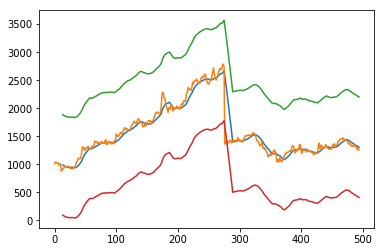

In [72]:
Close_Price=shares2['Close Price'].rolling(window=14)
Avg=shares2['Average Price']
roll_mean=Close_Price.mean()
std_dev=roll_mean.std()
avg=pd.DataFrame(roll_mean)
Upper_band=roll_mean+(2*std_dev)
Lower_band=roll_mean-(2*std_dev)
plt.plot(avg)
plt.plot(Avg)
plt.plot(Upper_band)
plt.plot(Lower_band)

In [73]:
shares2['Bollinger band']=avg
shares2['Upper band']=Upper_band
shares2['Lower band']=Lower_band
shares2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Bollinger band,Upper band,Lower band
0,JUBLFOOD,EQ,15-May-2017,986.35,991.85,1031.00,983.55,1029.60,1025.45,1009.72,576466,5.820685e+08,19888,115368,20.01,NaN,NaN,NaN
1,JUBLFOOD,EQ,16-May-2017,1025.45,1028.50,1054.85,1028.50,1052.00,1050.65,1042.26,487510,5.081107e+08,15487,84859,17.41,NaN,NaN,NaN
2,JUBLFOOD,EQ,17-May-2017,1050.65,1044.00,1058.75,1024.20,1047.00,1049.05,1039.93,393751,4.094726e+08,15205,61936,15.73,NaN,NaN,NaN
3,JUBLFOOD,EQ,18-May-2017,1049.05,1039.70,1049.15,1012.20,1014.10,1019.35,1033.80,381432,3.943245e+08,10345,40599,10.64,NaN,NaN,NaN
4,JUBLFOOD,EQ,19-May-2017,1019.35,1022.00,1042.20,1011.00,1012.55,1018.10,1025.24,287852,2.951171e+08,9834,60049,20.86,NaN,NaN,NaN
5,JUBLFOOD,EQ,22-May-2017,1018.10,1018.10,1038.00,1015.00,1022.85,1030.30,1026.60,321837,3.303982e+08,9940,87006,27.03,NaN,NaN,NaN
6,JUBLFOOD,EQ,23-May-2017,1030.30,1030.00,1030.00,990.00,990.00,993.15,1009.44,342845,3.460831e+08,12009,77703,22.66,NaN,NaN,NaN
7,JUBLFOOD,EQ,24-May-2017,993.15,995.00,1005.90,966.00,974.45,976.45,988.12,448045,4.427233e+08,12040,42627,9.51,NaN,NaN,NaN
8,JUBLFOOD,EQ,25-May-2017,976.45,974.45,1024.00,965.25,1024.00,1014.95,998.09,524803,5.238030e+08,23985,109155,20.80,NaN,NaN,NaN
9,JUBLFOOD,EQ,26-May-2017,1014.95,1024.00,1035.00,982.50,993.95,992.70,1013.20,391221,3.963857e+08,17661,72571,18.55,NaN,NaN,NaN


In [74]:
X=pd.DataFrame(shares2.iloc[13:494,15:18])
X['Close Price']=shares2['Close Price']
shares2['Call']=pd.DataFrame
X

,Bollinger band,Upper band,Lower band,Close Price
13,989.057143,1884.689832,93.424453,912.25
14,982.300000,1877.932689,86.667311,930.85
15,974.114286,1869.746975,78.481596,936.05
16,967.221429,1862.854118,71.588739,952.55
17,962.639286,1858.271975,67.006596,955.20
18,958.760714,1854.393404,63.128025,963.80
19,954.389286,1850.021975,58.756596,969.10
20,951.989286,1847.621975,56.356596,959.55
21,951.532143,1847.164832,55.899453,970.05
22,947.792857,1843.425547,52.160168,962.60


In [75]:
y_pred=reg.predict(X)
shares2.iloc[13:494,18]=y_pred
shares2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Bollinger band,Upper band,Lower band,Call
0,JUBLFOOD,EQ,15-May-2017,986.35,991.85,1031.00,983.55,1029.60,1025.45,1009.72,576466,5.820685e+08,19888,115368,20.01,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
1,JUBLFOOD,EQ,16-May-2017,1025.45,1028.50,1054.85,1028.50,1052.00,1050.65,1042.26,487510,5.081107e+08,15487,84859,17.41,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
2,JUBLFOOD,EQ,17-May-2017,1050.65,1044.00,1058.75,1024.20,1047.00,1049.05,1039.93,393751,4.094726e+08,15205,61936,15.73,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
3,JUBLFOOD,EQ,18-May-2017,1049.05,1039.70,1049.15,1012.20,1014.10,1019.35,1033.80,381432,3.943245e+08,10345,40599,10.64,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
4,JUBLFOOD,EQ,19-May-2017,1019.35,1022.00,1042.20,1011.00,1012.55,1018.10,1025.24,287852,2.951171e+08,9834,60049,20.86,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
5,JUBLFOOD,EQ,22-May-2017,1018.10,1018.10,1038.00,1015.00,1022.85,1030.30,1026.60,321837,3.303982e+08,9940,87006,27.03,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
6,JUBLFOOD,EQ,23-May-2017,1030.30,1030.00,1030.00,990.00,990.00,993.15,1009.44,342845,3.460831e+08,12009,77703,22.66,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
7,JUBLFOOD,EQ,24-May-2017,993.15,995.00,1005.90,966.00,974.45,976.45,988.12,448045,4.427233e+08,12040,42627,9.51,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
8,JUBLFOOD,EQ,25-May-2017,976.45,974.45,1024.00,965.25,1024.00,1014.95,998.09,524803,5.238030e+08,23985,109155,20.80,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>
9,JUBLFOOD,EQ,26-May-2017,1014.95,1024.00,1035.00,982.50,993.95,992.70,1013.20,391221,3.963857e+08,17661,72571,18.55,NaN,NaN,NaN,<class 'pandas.core.frame.DataFrame'>


### Query 4.2
Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.

Import the stock data file of your choice
Define 4 new columns , whose values are: 
 % change between Open and Close price for the day 
 % change between Low and High price for the day 
 5 day rolling mean of the day to day % change in Close Price 
 5 day rolling std of the day to day % change in Close Price
Create a new column 'Action' whose values are: 
 1 if next day's price(Close) is greater than present day's. 
 (-1) if next day's price(Close) is less than present day's. 

i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

Construct a classification model with the 4 new inputs and 'Action' as target
Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model


In [76]:
shares['Open_Close_Perc']=((shares['Open Price']-shares['Close Price'])/shares['Open Price'])*100
shares['Low_High_Perc']=((shares['High Price']-shares['Low Price'])/shares['Low Price'])*100

shares['Roll_mean']=shares['Close Price'].rolling(5).mean()
shares['Roll_std']=shares['Close Price'].rolling(5).std()

In [77]:
count1=shares['Close Price'].count()
shares['Action']=pd.DataFrame
for i in range(0,count1-1):
    if(shares['Close Price'].iloc[i+1]>shares['Close Price'].iloc[i]):
        shares['Action'].iloc[i]=1
    else:
        shares['Action'].iloc[i]=-1

C:\Users\prash\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [78]:
from sklearn.datasets import make_classification
X=shares.iloc[5:493,19:23]
y=shares.iloc[5:493,23]
y=y.astype('int')
y.dtype
y

5     -1
6      1
7      1
8     -1
9     -1
10     1
11     1
12    -1
13     1
14     1
15    -1
16    -1
17     1
18    -1
19     1
20    -1
21    -1
22    -1
23    -1
24     1
25     1
26    -1
27     1
28     1
29    -1
30     1
31    -1
32     1
33     1
34     1
      ..
463   -1
464   -1
465    1
466    1
467    1
468   -1
469   -1
470    1
471    1
472    1
473    1
474    1
475   -1
476    1
477   -1
478   -1
479    1
480   -1
481    1
482    1
483   -1
484    1
485    1
486   -1
487    1
488   -1
489    1
490   -1
491   -1
492    1
Name: Action, Length: 488, dtype: int32

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
y_test=y_test.astype('int')

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [82]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.47619047619047616


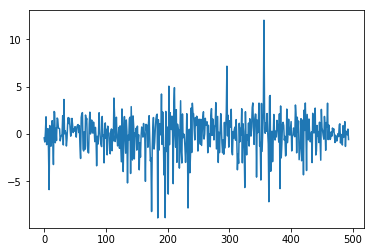

In [86]:
plt.plot(shares['Open_Close_Perc'])